In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv(r"D:\GeakMinds Internship\real world projects\datasets\housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [14]:
data['total_bedrooms'].isnull().sum()

207

In [16]:
mean=data['total_bedrooms'].mean()
data['total_bedrooms']=data['total_bedrooms'].fillna(mean)
data['total_bedrooms'].isnull().sum()

0

# spliting

In [18]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [157]:
from sklearn.model_selection import train_test_split

x=data[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']]
y=data['median_house_value']

In [158]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [159]:
data_training=x_train.join(y_train)
data_training.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17081,-122.19,37.47,44.0,1371.0,263.0,589.0,301.0,4.8068,NEAR BAY,312300.0
197,-122.22,37.77,52.0,1137.0,301.0,866.0,259.0,2.5900,NEAR BAY,96400.0
1307,-121.83,37.99,23.0,1970.0,296.0,935.0,279.0,4.4853,INLAND,145900.0
14361,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,NEAR OCEAN,291000.0
8569,-118.43,33.90,27.0,1536.0,377.0,553.0,326.0,5.4088,<1H OCEAN,500001.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

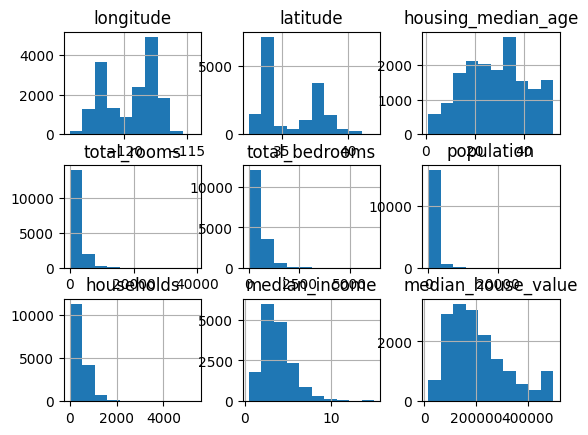

In [160]:
data_training.hist()

data is not normally distributed

<Axes: >

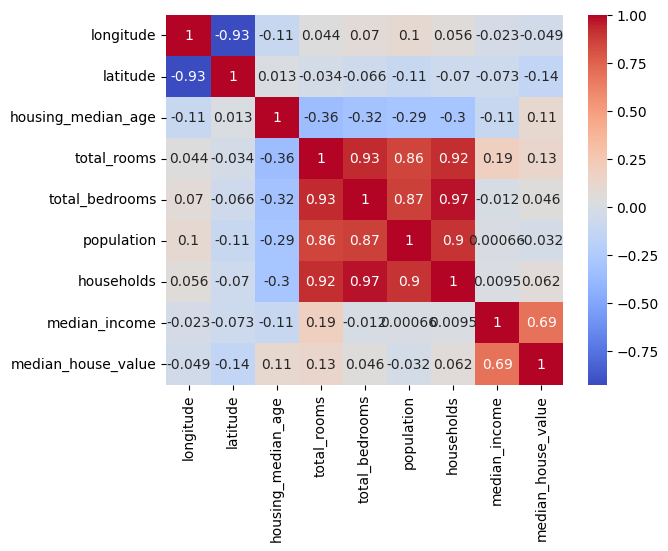

In [161]:
k=data_training.select_dtypes(include='number').corr()
sns.heatmap(k,annot=True,cmap='coolwarm')

In [162]:
from scipy.stats import boxcox as scipy_boxcox

def boxcox(df, columns):
    lambdas = {}
    df = df.copy()
    for col in columns:
        if df[col].min() <= 0:
            shift_value = abs(df[col].min()) + 1e-6 
            df[col] = df[col] + shift_value
        df[col], fitted_lambda = scipy_boxcox(df[col])
        lambdas[col] = fitted_lambda
        
    return df

data_training=boxcox(data_training,['total_rooms','population',
'housing_median_age','households','total_bedrooms','median_income'])

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

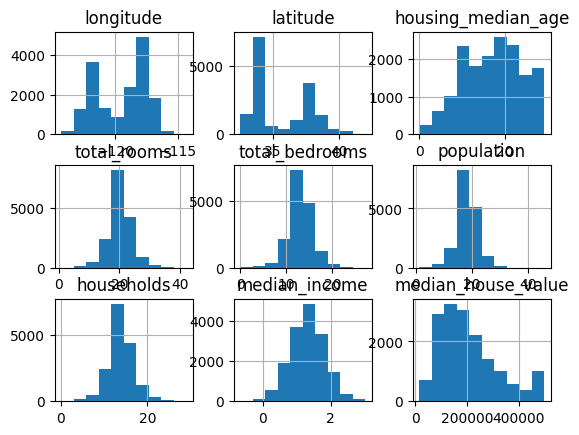

In [163]:
data_training.hist()

one hot encode

In [164]:
data_training = pd.get_dummies(data_training, columns=['ocean_proximity'])

In [165]:
data_training

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17081,-122.19,37.47,25.284638,17.713852,11.102239,14.801392,12.336165,1.674782,312300.0,False,False,False,True,False
197,-122.22,37.77,29.130802,16.816426,11.580556,16.608857,11.746975,0.989492,96400.0,False,False,False,True,False
1307,-121.83,37.99,14.438902,19.560741,11.520397,16.988277,12.035916,1.596338,145900.0,False,True,False,False,False
14361,-117.22,32.75,20.282455,26.250968,17.040234,22.892987,18.275315,1.621893,291000.0,False,False,False,False,True
8569,-118.43,33.90,16.614626,18.277091,12.411437,14.520939,12.657814,1.809511,500001.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2765,-115.90,32.69,11.614260,12.560918,7.650973,8.245847,6.726565,0.440604,57500.0,False,True,False,False,False
6759,-118.12,34.10,27.702608,19.790903,12.916680,17.829738,13.659276,1.483009,282600.0,True,False,False,False,False
13626,-117.27,34.11,25.284638,13.785803,8.917715,14.615936,9.777725,0.618337,62900.0,False,True,False,False,False
19097,-122.63,38.25,12.759958,22.739005,14.279000,20.217515,15.077104,1.384001,181900.0,True,False,False,False,False


<Axes: >

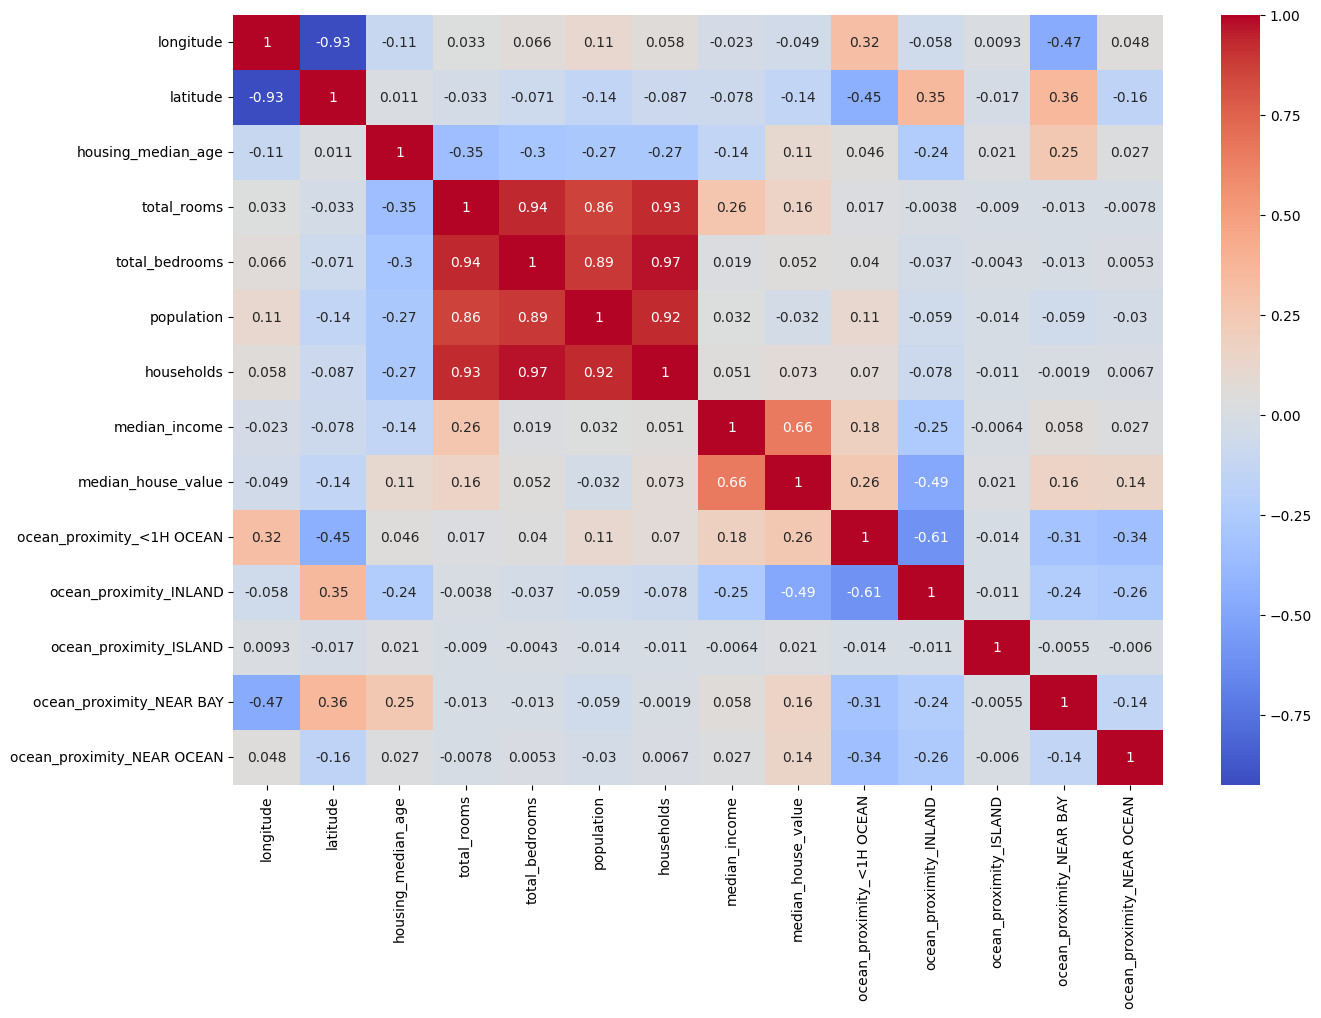

In [166]:
plt.figure(figsize=(15,10))
sns.heatmap(data_training.corr(),annot=True,cmap='coolwarm')


adding new cols

In [167]:
data_training['bhk_per_household'] = data_training['total_bedrooms'] / (data_training['households'] + 1e-6)
data_training['bhk_per_household']=np.log(data_training['bhk_per_household']+1.5)

In [168]:
data_training['population']=np.log(data_training['population']+1.5)

<Axes: >

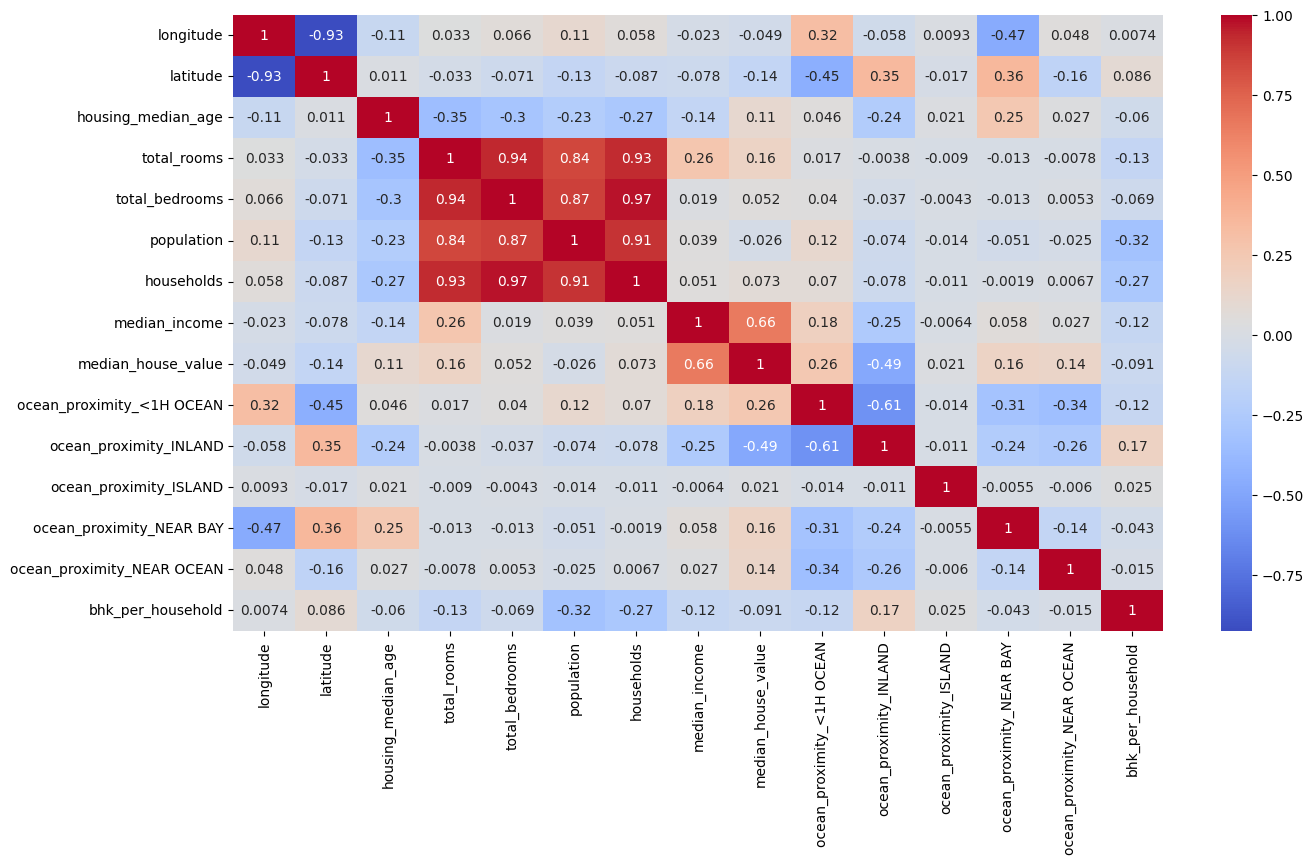

In [169]:
plt.figure(figsize=(15,8))
sns.heatmap(data_training.corr(),annot=True,cmap='coolwarm')

In [170]:
data_training.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bhk_per_household
17081,-122.19,37.47,25.284638,17.713852,11.102239,2.791251,12.336165,1.674782,312300.0,False,False,False,True,False,0.875458
197,-122.22,37.77,29.130802,16.816426,11.580556,2.896401,11.746975,0.989492,96400.0,False,False,False,True,False,0.910608
1307,-121.83,37.99,14.438902,19.560741,11.520397,2.917137,12.035916,1.596338,145900.0,False,True,False,False,False,0.899010
14361,-117.22,32.75,20.282455,26.250968,17.040234,3.194296,18.275315,1.621893,291000.0,False,False,False,False,True,0.888886
8569,-118.43,33.90,16.614626,18.277091,12.411437,2.773897,12.657814,1.809511,500001.0,True,False,False,False,False,0.908474


In [171]:
data_training.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bhk_per_household
17081,-122.19,37.47,25.284638,17.713852,11.102239,2.791251,12.336165,1.674782,312300.0,False,False,False,True,False,0.875458
197,-122.22,37.77,29.130802,16.816426,11.580556,2.896401,11.746975,0.989492,96400.0,False,False,False,True,False,0.910608
1307,-121.83,37.99,14.438902,19.560741,11.520397,2.917137,12.035916,1.596338,145900.0,False,True,False,False,False,0.899010
14361,-117.22,32.75,20.282455,26.250968,17.040234,3.194296,18.275315,1.621893,291000.0,False,False,False,False,True,0.888886
8569,-118.43,33.90,16.614626,18.277091,12.411437,2.773897,12.657814,1.809511,500001.0,True,False,False,False,False,0.908474


In [172]:
cols_to_drop = [

    'population', 
    'households', 
    'ocean_proximity_ISLAND', 
]

data_training = data_training.drop(columns=cols_to_drop)

x_train=data_training.drop(['median_house_value'],axis=1)
y_train=data_training['median_house_value']

In [173]:
data_testing=x_test.join(y_test)
data_testing=boxcox(data_testing,['total_rooms','population',
'housing_median_age','households','total_bedrooms','median_income'])
data_testing = pd.get_dummies(data_testing, columns=['ocean_proximity'])
data_testing['bhk_per_household'] = data_testing['total_bedrooms'] / (data_testing['households'] + 1e-6)
data_testing['bhk_per_household']=np.log(data_testing['bhk_per_household']+1.5)
data_testing['population']=np.log(data_testing['population']+1.5)
data_testing = data_testing.drop(columns=cols_to_drop)
x_test=data_testing.drop(['median_house_value'],axis=1)
y_test=data_testing['median_house_value']

In [174]:
x_test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'median_income', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN', 'bhk_per_household'],
      dtype='object')

In [175]:
x_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'median_income', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN', 'bhk_per_household'],
      dtype='object')

In [186]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()

In [187]:
forest.score(x_test,y_test)

0.7958180041070414

In [194]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(150, 400),
    'min_samples_split': [2, 4],
    'max_depth': [None, 4, 8]
}

random_search = RandomizedSearchCV(forest, param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='neg_mean_squared_error',
                                   n_jobs=-1, random_state=42)

random_search.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 4, 8],
                                        'min_samples_split': [2, 4],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000295B1335820>},
                   random_state=42, scoring='neg_mean_squared_error')

In [195]:
random_search.best_estimator_

RandomForestRegressor(n_estimators=252)

In [196]:
random_search.best_estimator_.score(x_test,y_test)

0.7962236962187191